<a href="https://colab.research.google.com/github/yuyunt7/ODL-Assignment/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2

# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [5]:
#Drop duplications in dataframe
df.drop_duplicates(inplace=True)

In [6]:
for name in df.columns:
    df[name] = df[name].astype(int)

In [7]:
# drop column
df = df.drop(['AnyHealthcare','Education'], axis=1);

In [8]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']

1     35097
0    194377
Name: Diabetes_binary, dtype: int64
1    15.294543%
0    84.705457%
Name: Diabetes_binary, dtype: object



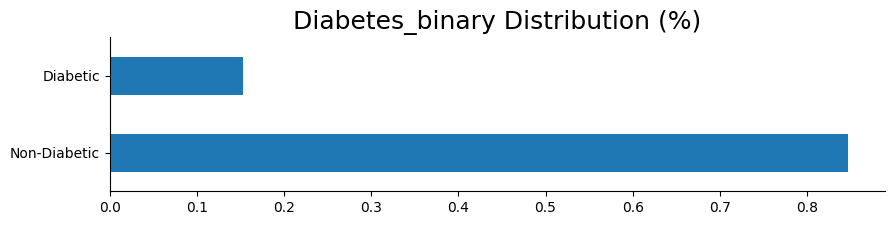

In [9]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [10]:
from sklearn.utils import resample

In [11]:
# deal with imbalance

# Separate majority and minority classes
df_majority = df[df.Diabetes_binary==0]
df_minority = df[df.Diabetes_binary==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=35097,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

0    35097
1    35097
Name: Diabetes_binary, dtype: int64
0    50.000000%
1    50.000000%
Name: Diabetes_binary, dtype: object



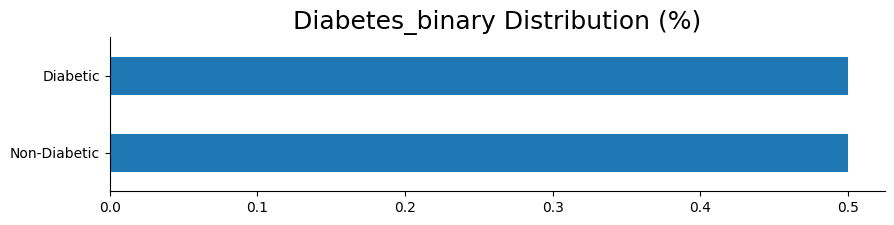

In [12]:
print(df_downsampled['Diabetes_binary'].value_counts(ascending=True))
print(df_downsampled['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df_downsampled['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [13]:
# bmi (bar chart)
def tranform_bmi(x):
    if x < 18.5 :
        return 1
    elif 18.5 <= x <= 24.9 :
        return 2
    elif 25 <= x <= 29.9 :
        return 3
    else:
        return 4

In [14]:
df_downsampled['BMI_bins'] = df_downsampled["BMI"].apply(tranform_bmi)

In [15]:
del df_downsampled["BMI"]

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [17]:
X = df_downsampled.iloc[:, 1:].values
y = df_downsampled.iloc[:, 0].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Reshape the data for 1D CNN
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=input_shape),  # Input layer
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling1D(pool_size=2),  # MaxPooling layer
    tf.keras.layers.Flatten(),  # Flatten the output
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
1755/1755 [==============================] - 7s 3ms/step - loss: 0.5516 - accuracy: 0.7180 - val_loss: 0.5588 - val_accuracy: 0.7152
Epoch 2/10
1755/1755 [==============================] - 6s 4ms/step - loss: 0.5448 - accuracy: 0.7213 - val_loss: 0.5437 - val_accuracy: 0.7216
Epoch 3/10
1755/1755 [==============================] - 5s 3ms/step - loss: 0.5435 - accuracy: 0.7210 - val_loss: 0.5445 - val_accuracy: 0.7256
Epoch 4/10
1755/1755 [==============================] - 5s 3ms/step - loss: 0.5419 - accuracy: 0.7227 - val_loss: 0.5403 - val_accuracy: 0.7268
Epoch 5/10
1755/1755 [==============================] - 10s 5ms/step - loss: 0.5413 - accuracy: 0.7232 - val_loss: 0.5412 - val_accuracy: 0.7278
Epoch 6/10
1755/1755 [==============================] - 5s 3ms/step - loss: 0.5402 - accuracy: 0.7241 - val_loss: 0.5388 - val_accuracy: 0.7266
Epoch 7/10
1755/1755 [==============================] - 6s 3ms/step - loss: 0.5395 - accuracy: 0.7240 - val_loss: 0.5397 - val_accuracy

In [22]:
# Evaluate the model
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
pre = precision_score(y_test, y_pred_binary, average ='micro')
recall = recall_score(y_test, y_pred_binary, average ='micro')
f1 = f1_score(y_test, y_pred_binary, average ='micro')
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("CNN - Test Accuracy: {:.3f}.".format(accuracy))
print("CNN - Precision: {:.3f}.".format(pre))
print("CNN - Recall: {:.3f}.".format(recall))
print("CNN - F1_Score: {:.3f}.".format(f1))
print("Confusion Matrix:\n", conf_matrix)
print("Classification_report", classification_report(y_test, y_pred_binary))

439/439 [==============================] - 1s 1ms/step
CNN - Test Accuracy: 0.727.
CNN - Precision: 0.727.
CNN - Recall: 0.727.
CNN - F1_Score: 0.727.
Confusion Matrix:
 [[4644 2368]
 [1462 5565]]
Classification_report               precision    recall  f1-score   support

           0       0.76      0.66      0.71      7012
           1       0.70      0.79      0.74      7027

    accuracy                           0.73     14039
   macro avg       0.73      0.73      0.73     14039
weighted avg       0.73      0.73      0.73     14039



In [23]:

# Define the CNN model
def create_cnn_model(filters=32, kernel_size=3, pool_size=2, units=64):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=pool_size),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# Create the CNN model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=2, batch_size=32, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'units': [32, 64, 128]
}

# Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'filters': [32], #cant adjust
#     'kernel_size': [5],
#     'pool_size': [3],
#     'units': [32]  #cant adjust
# }


<ipython-input-26-6d0ab6fa53ba>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=2, batch_size=32, verbose=0)


In [35]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_reshaped, y_train)

# Get the best model
best_model = grid_result.best_estimator_
results_summary = pd.DataFrame(grid_result.cv_results_).sort_values(by='rank_test_score').head(10)
results_summary

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_filters,param_kernel_size,param_pool_size,param_units,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
34,11.621024,0.260657,1.800393,0.420257,64,5,3,64,"{'filters': 64, 'kernel_size': 5, 'pool_size':...",0.728351,0.732717,0.726466,0.729178,0.002618,1
35,8.759313,2.092678,1.317273,0.218850,64,5,3,128,"{'filters': 64, 'kernel_size': 5, 'pool_size':...",0.727015,0.731435,0.728817,0.729089,0.001815,2
11,6.887410,0.765607,1.499925,0.026146,16,5,3,128,"{'filters': 16, 'kernel_size': 5, 'pool_size':...",0.726214,0.731809,0.727108,0.728377,0.002454,3
21,7.784369,2.517161,0.951458,0.054111,32,5,3,32,"{'filters': 32, 'kernel_size': 5, 'pool_size':...",0.721994,0.728123,0.728443,0.726187,0.002968,4
22,5.948583,0.241481,1.520730,0.043528,32,5,3,64,"{'filters': 32, 'kernel_size': 5, 'pool_size':...",0.724825,0.727108,0.725879,0.725937,0.000933,5
33,6.442892,0.717867,1.473531,0.007752,64,5,3,32,"{'filters': 64, 'kernel_size': 5, 'pool_size':...",0.725359,0.733038,0.718987,0.725795,0.005744,6
9,6.104086,0.021866,1.521786,0.047029,16,5,3,32,"{'filters': 16, 'kernel_size': 5, 'pool_size':...",0.725680,0.726573,0.724650,0.725634,0.000786,7
23,9.594416,2.304208,1.275269,0.251507,32,5,3,128,"{'filters': 32, 'kernel_size': 5, 'pool_size':...",0.724184,0.729191,0.722994,0.725456,0.002685,8
10,7.731839,2.399313,1.534731,0.106680,16,5,3,64,"{'filters': 16, 'kernel_size': 5, 'pool_size':...",0.721940,0.729031,0.724062,0.725011,0.002971,9
18,6.697254,0.699089,1.390026,0.131376,32,5,2,32,"{'filters': 32, 'kernel_size': 5, 'pool_size':...",0.722154,0.723795,0.720910,0.722287,0.001181,10


In [ ]:
# Create the CNN model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'units': [32, 64, 128]
}


# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_reshaped, y_train)

# Get the best model
best_model = grid_result.best_estimator_
results_summary = pd.DataFrame(grid_result.cv_results_).sort_values(by='rank_test_score').head(10)
results_summary

In [34]:

# Evaluate the model
y_pred = best_model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
pre = precision_score(y_test, y_pred_binary, average ='micro')
recall = recall_score(y_test, y_pred_binary, average ='micro')
f1 = f1_score(y_test, y_pred_binary, average ='micro')
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("CNN - Test Accuracy: {:.3f}.".format(accuracy))
print("CNN - Precision: {:.3f}.".format(pre))
print("CNN - Recall: {:.3f}.".format(recall))
print("CNN - F1_Score: {:.3f}.".format(f1))
print("Confusion Matrix:\n", conf_matrix)
print("Classification_report", classification_report(y_test, y_pred_binary))

439/439 [==============================] - 1s 2ms/step
CNN - Test Accuracy: 0.727.
CNN - Precision: 0.727.
CNN - Recall: 0.727.
CNN - F1_Score: 0.727.
Confusion Matrix:
 [[5097 1915]
 [1924 5103]]
Classification_report               precision    recall  f1-score   support

           0       0.73      0.73      0.73      7012
           1       0.73      0.73      0.73      7027

    accuracy                           0.73     14039
   macro avg       0.73      0.73      0.73     14039
weighted avg       0.73      0.73      0.73     14039

